# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 32

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 3

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
156,Butland,Crystal Palace,44,6.0,19,26.513967,3.2,4.418994,NaN,23.557042,2.106673
129,Arrizabalaga,Chelsea,45,4.0,19,17.397594,4.8,4.349399,NaN,30.421078,2.050326
80,Raya,Brentford,43,18.0,74,69.683705,4.1,3.871317,4.329037,22.847065,1.866915
448,Gunn,Norwich City,40,7.0,26,26.028906,3.7,3.718415,NaN,22.111804,1.859208
559,Ramsdale,Arsenal,51,26.0,119,101.909314,4.6,3.919589,3.830176,29.568995,1.735623
270,de Gea,Manchester Utd,51,31.0,117,120.580493,3.8,3.889693,3.296171,25.371496,1.722385
231,Alisson,Liverpool,60,29.0,145,119.619584,5.0,4.124813,5.002101,32.029384,1.683948
475,Sá,Wolves,53,32.0,137,123.702315,4.3,3.865697,3.630154,21.819111,1.679152
146,Guaita,Crystal Palace,46,26.0,97,93.560522,3.7,3.598482,4.773998,29.704750,1.677801


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,56,6.0,54,37.267392,9.0,6.211232,NaN,38.825788,2.624725
237,Alexander-Arnold,Liverpool,84,27.0,191,172.390337,7.1,6.384827,6.841428,36.293318,2.202975
256,Cancelo,Manchester City,70,29.0,173,168.656738,6.0,5.815750,6.136318,25.807075,2.198147
360,Doherty,Tottenham,49,15.0,67,71.844422,4.5,4.789628,6.842799,31.232392,2.163733
245,Tsimikas,Liverpool,37,10.0,38,40.693236,3.8,4.069324,NaN,19.736071,2.115541
142,James,Chelsea,63,19.0,110,97.914574,5.8,5.153399,3.977399,34.508389,2.053163
122,Alonso,Chelsea,55,21.0,91,99.971371,4.3,4.760541,5.263061,33.606356,2.029902
258,Aké,Manchester City,47,10.0,44,43.119910,4.4,4.311991,5.619350,21.146246,1.988973
501,Sarr,Chelsea,49,5.0,29,21.896993,5.8,4.379399,7.274923,33.820954,1.978411


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,67,4.0,26,25.212991,6.5,6.303248,NaN,22.727763,2.435157
233,Salah,Liverpool,132,29.0,230,219.684146,7.9,7.575315,6.955775,43.431301,2.085037
420,Bowen,West Ham,69,30.0,168,156.050773,5.6,5.201692,4.314486,24.959213,1.980250
701,Kulusevski,Tottenham,64,11.0,65,54.288394,5.9,4.935309,6.750629,33.405051,1.950852
681,Coutinho,Aston Villa,71,12.0,63,60.923443,5.2,5.076954,6.640229,28.753035,1.905347
240,Jota,Liverpool,83,28.0,154,153.219865,5.5,5.472138,4.480301,29.175194,1.899407
359,Son,Tottenham,111,28.0,198,174.109730,7.1,6.218205,8.659629,45.010852,1.866395
265,Foden,Manchester City,78,23.0,108,118.950448,4.7,5.171759,3.623392,23.781924,1.851787
96,Mbeumo,Brentford,52,29.0,105,120.845159,3.6,4.167074,5.979059,23.870271,1.827383


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
78,Toney,Brentford,69,27.0,126,122.284,4.7,4.529037,7.908400,18.772610,1.724175
315,Pukki,Norwich City,59,30.0,115,111.402,3.8,3.713400,6.967750,27.120092,1.528783
357,Kane,Tottenham,126,30.0,150,162.250,5.0,5.408333,9.199400,36.361659,1.523625
450,Dennis,Watford,58,29.0,117,102.726,4.0,3.542276,3.150000,25.466798,1.470850
263,Jesus,Manchester City,84,22.0,82,92.797,3.7,4.218045,6.500000,27.138532,1.455364
413,Antonio,West Ham,75,31.0,120,123.159,3.9,3.972871,2.554200,24.452667,1.450687
177,Calvert-Lewin,Everton,77,13.0,41,52.131,3.2,4.010077,2.267750,28.046016,1.445131
579,Ronaldo,Manchester Utd,122,25.0,118,124.453,4.7,4.978120,5.400000,31.002753,1.425232
40,Watkins,Aston Villa,74,28.0,98,107.262,3.5,3.830786,5.560000,28.474976,1.408225


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
233,Salah,Liverpool,132,29.0,230,219.684146,7.9,7.575315,43.431301,2.085037
237,Alexander-Arnold,Liverpool,84,27.0,191,172.390337,7.1,6.384827,36.293318,2.202975
268,Torres,Manchester City,67,4.0,26,25.212991,6.5,6.303248,22.727763,2.435157
359,Son,Tottenham,111,28.0,198,174.109730,7.1,6.218205,45.010852,1.866395
135,Chilwell,Chelsea,56,6.0,54,37.267392,9.0,6.211232,38.825788,2.624725
253,Mendy,Manchester City,52,1.0,3,5.841991,3.0,5.841991,22.057155,2.561883
256,Cancelo,Manchester City,70,29.0,173,168.656738,6.0,5.815750,25.807075,2.198147
230,Mané,Liverpool,117,28.0,148,155.919865,5.3,5.568567,31.407643,1.627985
240,Jota,Liverpool,83,28.0,154,153.219865,5.5,5.472138,29.175194,1.899407


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
135,Chilwell,Chelsea,56,6.0,9.0,6.211232,NaN,38.825788,2.624725
268,Torres,Manchester City,67,4.0,6.5,6.303248,NaN,22.727763,2.435157
237,Alexander-Arnold,Liverpool,84,27.0,7.1,6.384827,6.841428,36.293318,2.202975
256,Cancelo,Manchester City,70,29.0,6.0,5.815750,6.136318,25.807075,2.198147
360,Doherty,Tottenham,49,15.0,4.5,4.789628,6.842799,31.232392,2.163733
245,Tsimikas,Liverpool,37,10.0,3.8,4.069324,NaN,19.736071,2.115541
156,Butland,Crystal Palace,44,6.0,3.2,4.418994,NaN,23.557042,2.106673
233,Salah,Liverpool,132,29.0,7.9,7.575315,6.955775,43.431301,2.085037
142,James,Chelsea,63,19.0,5.8,5.153399,3.977399,34.508389,2.053163


In [11]:
metric = 'adjusted points per game'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
233,Salah,Liverpool,132,29.0,230,219.684146,7.9,7.575315,9.498966,43.431301,2.085037
237,Alexander-Arnold,Liverpool,84,27.0,191,172.390337,7.1,6.384827,5.546486,36.293318,2.202975
268,Torres,Manchester City,67,4.0,26,25.212991,6.5,6.303248,NaN,22.727763,2.435157
359,Son,Tottenham,111,28.0,198,174.109730,7.1,6.218205,8.228308,45.010852,1.866395
135,Chilwell,Chelsea,56,6.0,54,37.267392,9.0,6.211232,NaN,38.825788,2.624725
256,Cancelo,Manchester City,70,29.0,173,168.656738,6.0,5.815750,5.765201,25.807075,2.198147
230,Mané,Liverpool,117,28.0,148,155.919865,5.3,5.568567,7.652538,31.407643,1.627985
240,Jota,Liverpool,83,28.0,154,153.219865,5.5,5.472138,5.249118,29.175194,1.899407
357,Kane,Tottenham,126,30.0,150,162.250000,5.0,5.408333,7.886800,36.361659,1.523625


In [23]:
metric = f'gameweek {gameweek+1} prediction'
#metric = 'xPoints_next10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 33 prediction,valuePoints metric
id,,,,,,,,,,
579,Ronaldo,Manchester Utd,122,25.0,118,124.453000,4.7,4.978120,9.334090,1.425232
277,Fernandes,Manchester Utd,116,29.0,136,138.102761,4.7,4.762164,9.082151,1.398220
212,Maddison,Leicester City,70,28.0,130,115.536329,4.6,4.126297,9.003087,1.559594
215,Barnes,Leicester City,66,24.0,91,90.397996,3.8,3.766583,8.629274,1.466141
200,Schmeichel,Leicester City,49,29.0,102,103.411647,3.5,3.565919,8.219217,1.610918
210,Tielemans,Leicester City,64,24.0,97,94.211996,4.0,3.925500,8.217103,1.551690
345,Adams,Southampton,68,25.0,96,91.784000,3.8,3.671360,8.069302,1.407902
205,Vardy,Leicester City,103,18.0,92,78.142000,5.1,4.341222,7.909939,1.352675
517,Elyounoussi,Southampton,54,24.0,76,83.666670,3.2,3.486111,7.907951,1.500183


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
233,Salah,Liverpool,132,29.0,7.9,7.575315,2.085037,19.1,9.3,28.4,0.979310
357,Kane,Tottenham,126,30.0,5.0,5.408333,1.523625,15.1,7.7,22.8,0.760000
230,Mané,Liverpool,117,28.0,5.3,5.568567,1.627985,14.9,3.6,18.5,0.660714
240,Jota,Liverpool,83,28.0,5.5,5.472138,1.899407,14.4,4.2,18.6,0.664286
579,Ronaldo,Manchester Utd,122,25.0,4.7,4.978120,1.425232,13.5,2.7,16.2,0.648000
359,Son,Tottenham,111,28.0,7.1,6.218205,1.866395,12.1,7.1,19.2,0.685714
255,Sterling,Manchester City,105,25.0,5.0,5.218098,1.610340,10.9,3.8,14.7,0.588000
78,Toney,Brentford,69,27.0,4.7,4.529037,1.724175,10.3,4.8,15.1,0.559259
40,Watkins,Aston Villa,74,28.0,3.5,3.830786,1.408225,9.9,2.2,12.1,0.432143


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 33 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
700,Weghorst,Burnley,64,12.0,34,33.442,2.8,2.786833,5.051091,21.262845,1.101593


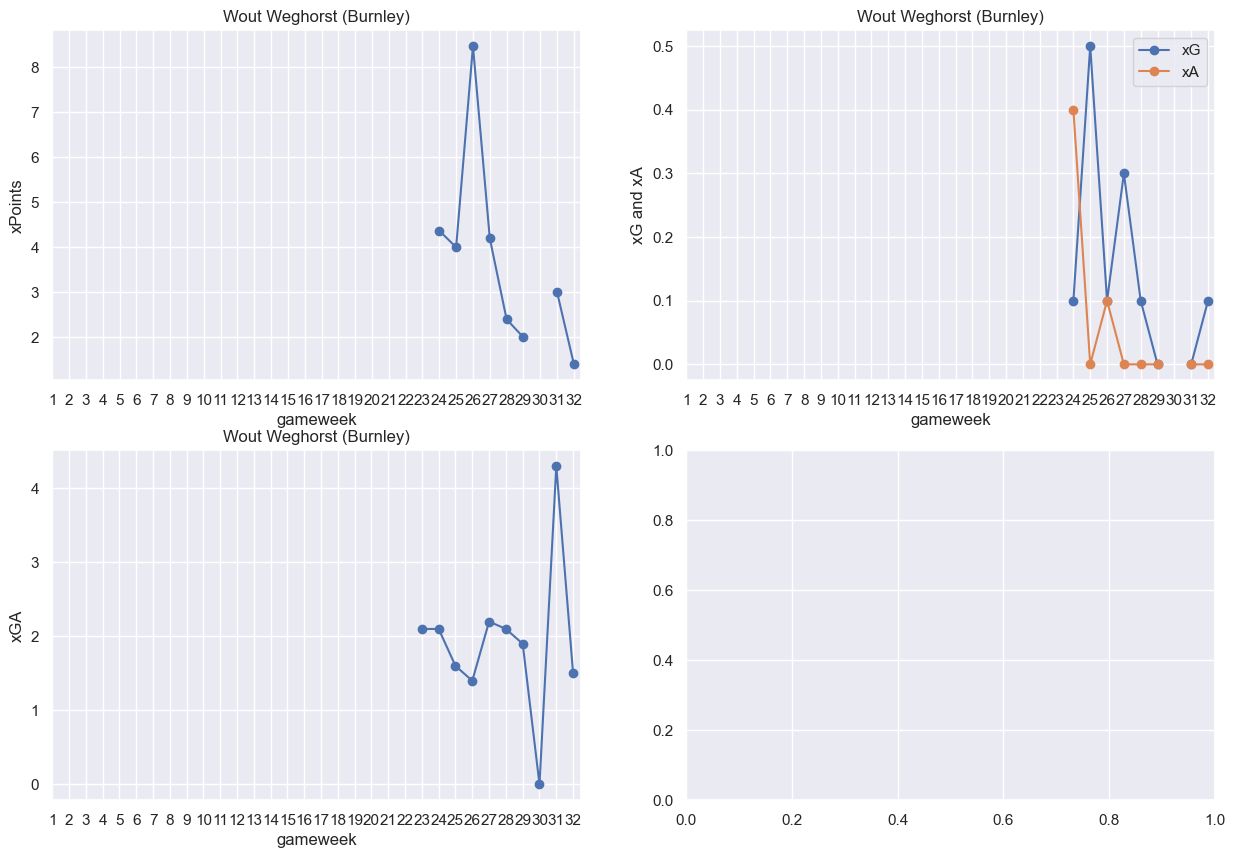

In [15]:
# find player index
name_string = 'Wegho'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound[['web_name','team_name','now_cost','games played','total_points','adjusted points',\
                      'points_per_game','adjusted points per game',f'gameweek {gameweek+1} prediction',\
                      'xPoints_next10', 'valuePoints metric']])
# plot xPoints over time
ix = playersFound.index[0]
#ix = 266

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [16]:
session = requests.session()

In [17]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [18]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 
#"redirect_uri": "https://fantasy.premierleague.com/",
#'redirect_uri': 'https://fantasy.premierleague.com/api/bootstrap-static/',
'app': 'plfpl-web'
}

headers = {
   'authority': 'users.premierleague.com' ,
   'cache-control': 'max-age=0' ,
   'upgrade-insecure-requests': '1' ,
   'origin': 'https://fantasy.premierleague.com' ,
   'content-type': 'application/x-www-form-urlencoded' ,
   'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36' ,
   'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' ,
   'sec-fetch-site': 'same-site' ,
   'sec-fetch-mode': 'navigate' ,
   'sec-fetch-user': '?1' ,
   'sec-fetch-dest': 'document' ,
   'referer': 'https://fantasy.premierleague.com/my-team' ,
   'accept-language': 'en-US,en;q=0.9,he;q=0.8' ,
}

session.post(url, data=payload, headers=headers)

<Response [200]>

In [19]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [20]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [21]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 57.88549396437138
Predicted points next gameweek: 76.31694555282593


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 33 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
333,Forster,Southampton,44,14.0,2.9,3.189826,2.336815,3.198842,7.732948,26.534110,1.520690
510,Dalot,Manchester Utd,42,17.0,2.6,2.912843,3.106333,4.730078,5.961249,20.162521,1.421322
237,Alexander-Arnold,Liverpool,84,27.0,7.1,6.384827,6.841428,5.546486,5.069967,36.293318,2.202975
256,Cancelo,Manchester City,70,29.0,6.0,5.815750,6.136318,5.765201,4.367325,25.807075,2.198147
22,Saka,Arsenal,68,30.0,4.7,4.321405,5.854299,5.444588,7.687903,33.279761,1.657183
701,Kulusevski,Tottenham,64,11.0,5.9,4.935309,6.750629,5.950743,4.554126,33.405051,1.950852
215,Barnes,Leicester City,66,24.0,3.8,3.766583,3.444049,4.382701,8.629274,36.760582,1.466141
233,Salah,Liverpool,132,29.0,7.9,7.575315,6.955775,9.498966,6.111568,43.431301,2.085037
518,Broja,Southampton,55,26.0,3.2,3.213154,2.866667,3.812500,7.242599,24.010290,1.370093



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 33 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,41,20.0,3.1,3.136645,2.376005,3.127732,3.411477,24.344579,1.549079
142,James,Chelsea,63,19.0,5.8,5.153399,3.977399,3.977399,3.966116,34.508389,2.053163
138,Mount,Chelsea,75,26.0,5.5,4.879042,7.035841,6.576937,4.162813,36.904094,1.781574
290,Williams,Norwich City,39,24.0,1.5,1.824350,1.547362,1.651462,2.155570,17.293749,0.923795


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)